In [7]:
import requests 
import json
import pandas as pd 
import warnings
from tqdm import tqdm
from datetime import date
import matplotlib.pyplot as plt
from kats.consts import TimeSeriesData

In [2]:
url = "http://96ed-14-162-129-203.ngrok.io/api/stocks/AAA"
data = requests.get(url).content
data = json.loads(data)['data']['stock']
data = pd.DataFrame(data)

In [4]:
price = data['price']
time = data['createdAt']
time = pd.to_datetime(time)
time = time.dt.tz_localize(None)

In [5]:
data = list(zip(time,price))
df = pd.DataFrame(data = data)

In [6]:
df.to_csv('data.csv', index=False, header=['time','price'])
data_df = pd.read_csv("data.csv")
data_df.columns = ["time", "price"]
data_ts = TimeSeriesData(data_df)

In [123]:
from kats.models.prophet import ProphetModel, ProphetParams
params = ProphetParams(seasonality_mode='multiplicative')
m = ProphetModel(data_ts, params)
m.fit()
fcst = m.predict(steps=30, freq="MS")
m.plot()

In [8]:
from kats.models.sarima import SARIMAModel, SARIMAParams
warnings.simplefilter(action='ignore')

In [9]:
params = SARIMAParams(
    p = 2, 
    d=1, 
    q=1, 
    trend = 'ct', 
    seasonal_order=(1,0,1,12)
    )


In [10]:
m = SARIMAModel(data=data_ts, params=params)

In [11]:
m.fit()

In [12]:
fcst = m.predict(
    steps=30, 
    freq="MS"
    )

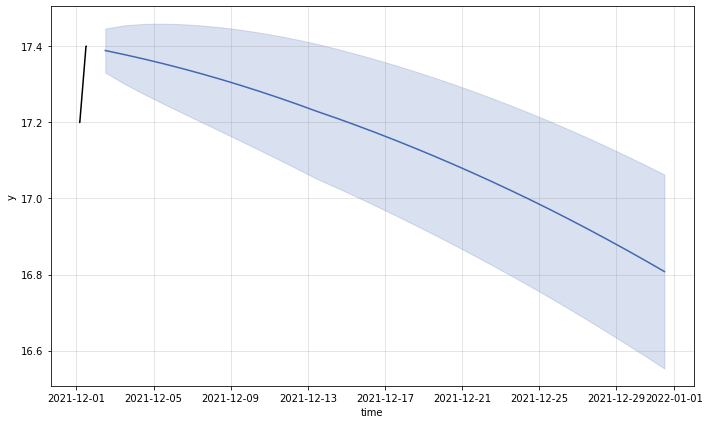

In [13]:
m.plot()